In [12]:
import pandas as pd
import psycopg as pg
import json
import matplotlib.pyplot as plt

engine = pg.connect("dbname='mnegron' user='mnegron' host='149.89.160.100' port='5432' password='4$g@38XUa2MvFb'")
pokedf = pd.read_sql('select * from pokedex_pokemon', con=engine)
traidf = pd.read_sql('select * from pokedex_trainer', con=engine)
enerdf = pd.read_sql('select * from pokedex_energy', con=engine)

/tmp/ipykernel_35223/1781761674.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pokedf = pd.read_sql('select * from pokedex_pokemon', con=engine)
/tmp/ipykernel_35223/1781761674.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  traidf = pd.read_sql('select * from pokedex_trainer', con=engine)
/tmp/ipykernel_35223/1781761674.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  enerdf = pd.read_sql('select * from pokedex_energy', con=engine)


[72, 26, 7]


([<matplotlib.patches.Wedge at 0x7f74d6651c90>,
 [Text(-0.6059867336244252, 0.9180305434304461, 'Pokemon'),
  Text(0.40187524778204176, -1.023961076027855, 'Trainers'),
  Text(1.0759623904280886, -0.2287027205441018, 'Energy')],
 [Text(-0.33053821834059555, 0.5007439327802432, '69%'),
  Text(0.21920468060838638, -0.5585242232879208, '25%'),
  Text(0.5868885765971392, -0.12474693847860097, '7%')])

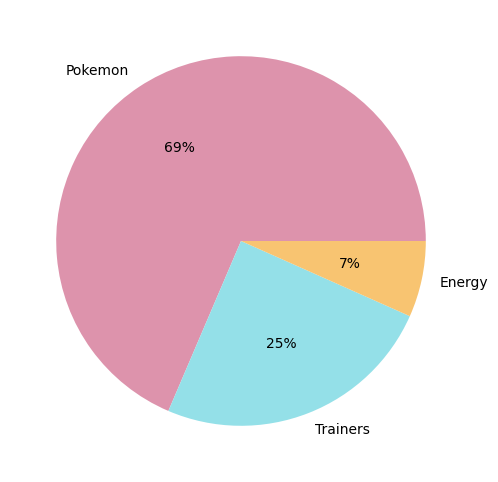

In [22]:
sizes = [len(pokedf.index), len(traidf.index), len(enerdf.index)]
labels = ['Pokemon', 'Trainers', 'Energy']
colors = ['#dd93ac', '#94e0e8', '#f8c471']
print(sizes)
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', colors=colors)